In [1]:
#Train and test
#Decision trees
#Confusion matrix
#Clustering
#Regression
#K-means
#Area and the curve ROC curve
#K-nearest neighbors

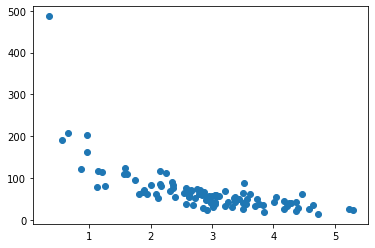

In [3]:
#Create model
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

x = np.random.normal(3,1,100)
y = np.random.normal(150,40,100) / x

plt.scatter(x,y)
plt.show()

In [17]:
#split into Train/Test model
#Training 80%
#Testing 20%
#100%

train_x = x[:80]
train_y = y[:80]


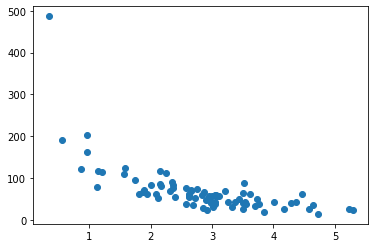

In [14]:
#Train the model
plt.scatter(train_x, train_y)
plt.show()

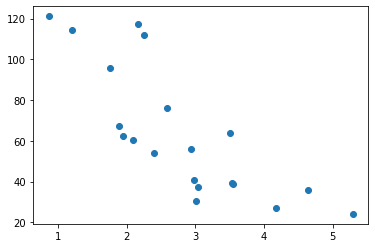

In [20]:
#test the model
test_x = x[:20]
test_y = y[:20]
plt.scatter(test_x, test_y)
plt.show()

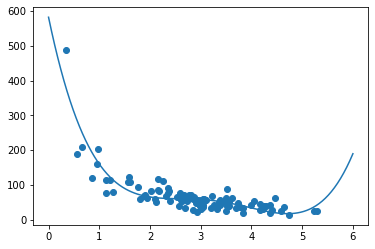

In [26]:
#draw a polynomial regression line through data points
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

x = np.random.normal(3,1,100)
y = np.random.normal(150,40,100) / x

train_x = x[:80]
train_y = y[:80]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))
myline = np.linspace(0,6,100)

plt.plot(myline, mymodel(myline))
plt.scatter(x,y)
plt.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('heart.csv')
print(data.to_string())

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0     40   M           ATA        140          289          0     Normal    172              N      0.0       Up             0
1     49   F           NAP        160          180          0     Normal    156              N      1.0     Flat             1
2     37   M           ATA        130          283          0         ST     98              N      0.0       Up             0
3     48   F           ASY        138          214          0     Normal    108              Y      1.5     Flat             1
4     54   M           NAP        150          195          0     Normal    122              N      0.0       Up             0
5     39   M           NAP        120          339          0     Normal    170              N      0.0       Up             0
6     45   F           ATA        130          237          0     Normal    170              N      0.0       U

In [31]:
#get rows and columns
data.shape

(918, 12)

In [33]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [35]:
#uniqueness about my data
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [38]:
#cleaning dataset
data.dropna(inplace=True)
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [40]:
#see categorical data values
data.head(12)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


<function matplotlib.pyplot.show(close=None, block=None)>

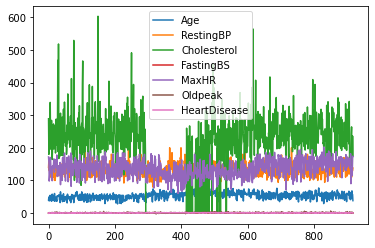

In [41]:
#visualise dataset
data.plot()
plt.show

In [43]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [44]:
data.tail(12)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [46]:
#apply ML algorithms for Training our model
#split our datasets | Training and testing the set
#scikitlearn sklearn

features = fit.transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, text_size = 0.2, random_state = 4)

NameError: name 'features' is not defined